### Importing libraries 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import plotly.graph_objects as go
import statsmodels.formula.api as smf

salaries = pd.read_csv('salary.csv')

### EDA

In [4]:
#checking for missing values
salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
#replacing the missing value with the mean
salaries['salary']= salaries.fillna(salaries['salary'].mean())

#Dropping duplicates
salaries.drop_duplicates(inplace = True)

In [6]:
#checking for extreme values
q3,q1 = np.percentile(salaries, [75,25])
IQR = q3-q1

#removing outliers from the dataset
new_salaries = salaries[~((salaries <(q1-1.5*IQR))| (salaries > (q3+1.5*IQR))).any(axis=1)]

In [7]:
#Split our data
x= salaries
y = salaries['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
y_train = pd.DataFrame(y_train)

### Distribution

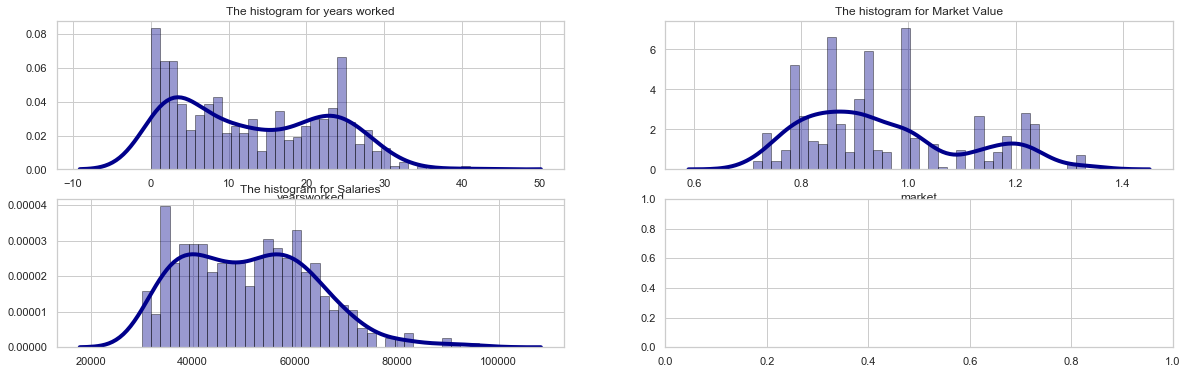

In [12]:
#Creating histograms with density line

sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2,figsize=(20, 6))

sns.distplot(X_train["yearsworked"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0,0])

sns.distplot(X_train["market"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0,1])

sns.distplot(y_train, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1,0])

axes[0,0].set_title('The histogram for years worked')
axes[0,1].set_title('The histogram for Market Value')
axes[1,0].set_title('The histogram for Salaries')
plt.show()

### Feature engineering

In [9]:
df_processed = pd.get_dummies(X_train, prefix_sep="_", columns=["Field"], drop_first=False)

df_processed.rename(columns={'1': 'Engineering', '2': 'Finance', '3':'Human Resources', '4':'Marketing'}, inplace=True)

df_processed.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field_1,Field_2,Field_3,Field_4
477,39574.0,1,15,9,0.80,1,0,2,0,43,0,0,1,0
465,49499.0,2,10,4,1.02,1,0,2,0,32,0,1,0,0
123,58949.0,0,12,6,1.23,1,0,2,1,1,0,1,0,0
155,54000.0,3,13,6,0.87,1,0,3,1,0,1,0,0,0
303,62173.0,1,24,4,1.13,1,0,3,1,0,0,1,0,0


### Modeling

In [10]:
data_corr = X_train.corr().iloc[:,0].sort_values()
data_corr

Field         -0.518092
yearsabs      -0.069788
degree         0.027700
exprior        0.092331
otherqual      0.172380
male           0.343522
market         0.375759
yearsrank      0.626115
yearsworked    0.630159
position       0.692308
salary         1.000000
Name: salary, dtype: float64

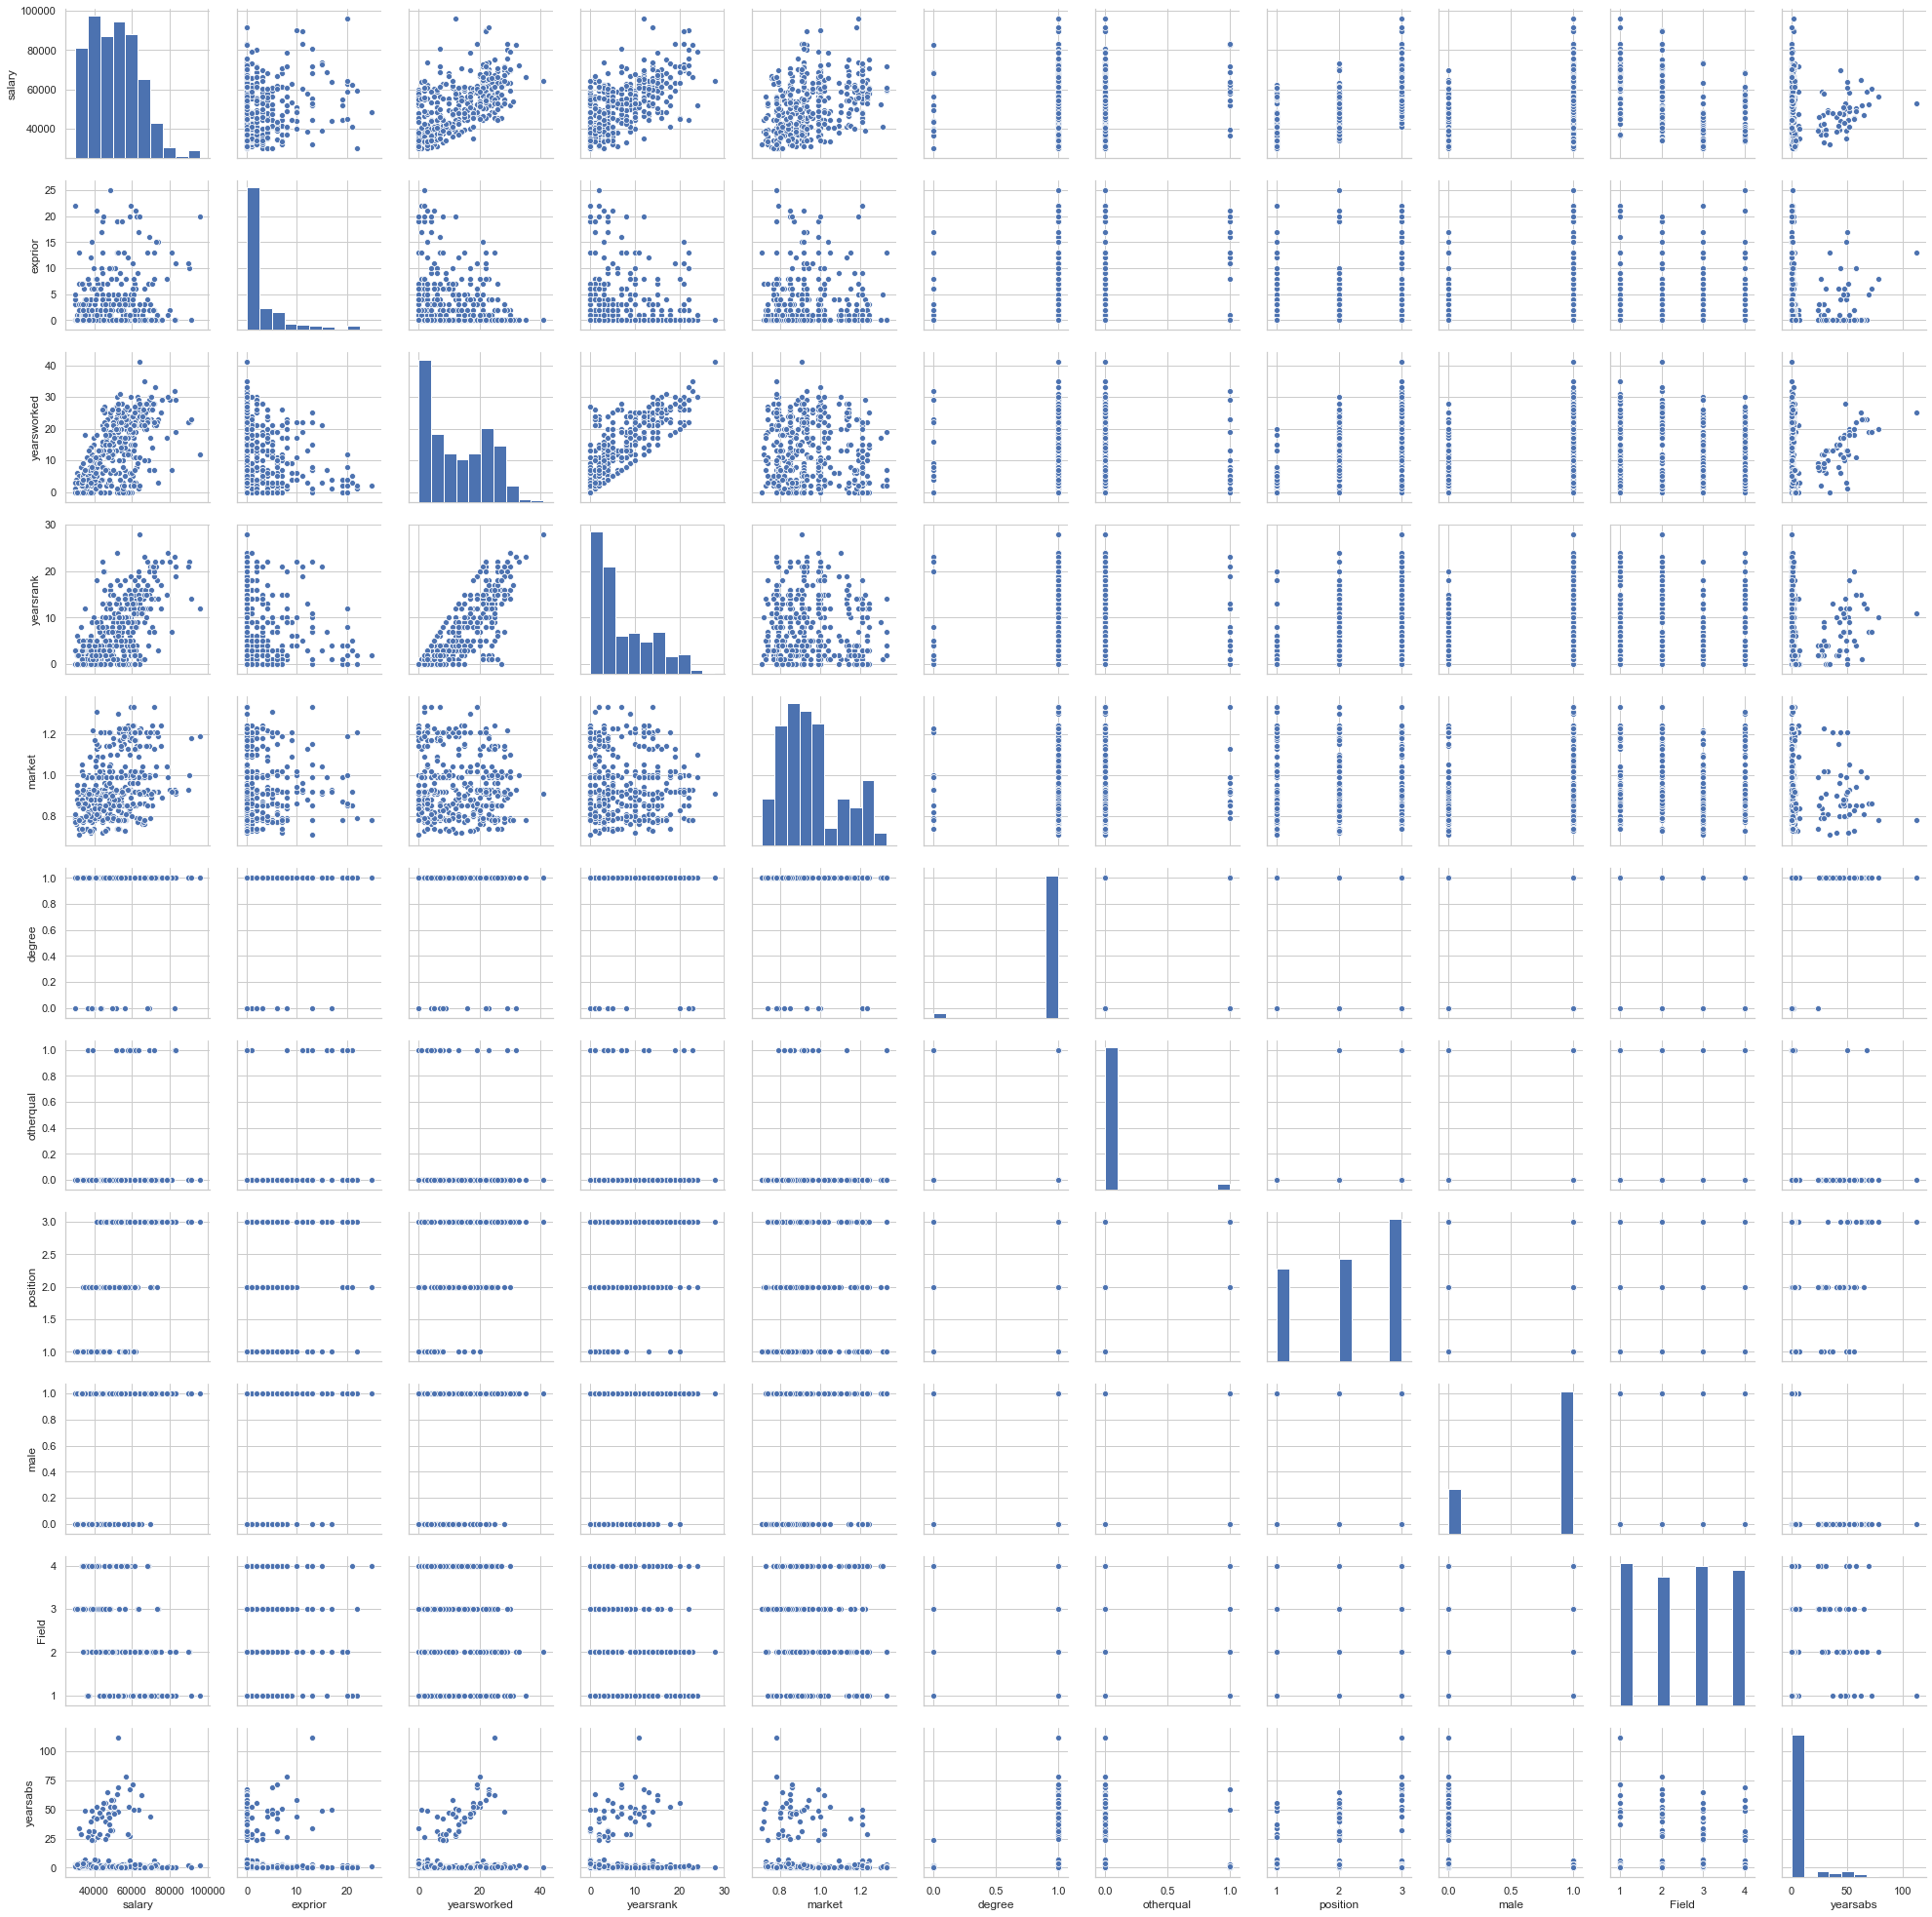

In [13]:
sns.pairplot(X_train)

In [11]:
strong_data = data_corr[abs(data_corr) > 0.49].sort_values(ascending=False)
strong_data

salary         1.000000
position       0.692308
yearsworked    0.630159
yearsrank      0.626115
Field         -0.518092
Name: salary, dtype: float64

In [19]:
# Fit regression model 
results = smf.ols('salary ~ position+yearsworked+yearsrank+Field', data=X_train).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           4.08e-94
Time:                        08:17:21   Log-Likelihood:                -4244.6
No. Observations:                 411   AIC:                             8499.
Df Residuals:                     406   BIC:                             8519.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.799e+04   1664.965     22.820      